<img src="files/bokeh-transparent.png" width="64px" height="64px"><h1>Bokeh 5-minute Overview
</h1>

Bokeh is an interactive web visualization library for Python 
(and other languages). It provides d3-like novel graphics, over
large datasets, all without requiring any knowledge of Javascript.  
It has a Matplotlib compatibility layer, and it works great with
the IPython Notebook, but can also be used to generate standalone HTML.

Simple Example
--------------

Here is a simple first example.  First we'll import the `bokeh.plotting`
module, which defines the graphical functions and primitives.

In [1]:
from bokeh.plotting import figure, output_notebook, show, vplot

Next, we'll tell Bokeh to display its plots directly into the notebook.
This will cause all of the Javascript and data to be embedded directly
into the HTML of the notebook itself.
(Bokeh can output straight to HTML files, or use a server, which we'll
look at later.)


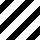
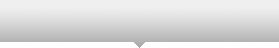
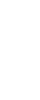
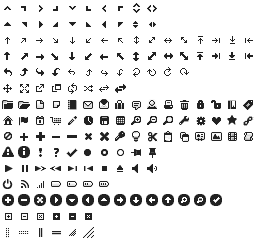
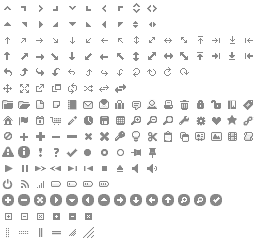
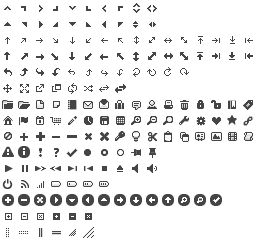
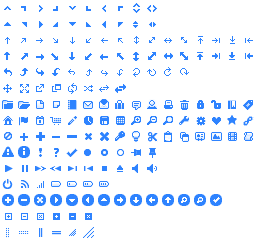
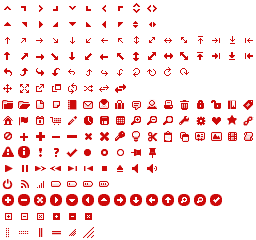
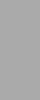
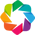
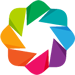
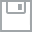
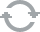
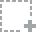
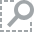
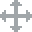
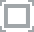
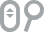

In [2]:
output_notebook()

Next, we'll import NumPy and create some simple data.

In [3]:
from numpy import cos, linspace
x = linspace(-6, 6, 100)
y = cos(x)

Now we'll call Bokeh's `circle()` function to render a red circle at
each of the points in x and y.

We can immediately interact with the plot:

  * click-drag will pan the plot around.
  * mousewheel will zoom in and out
  
(The toolbar is simply a default one that is available for all plots;
this can be configured dynamically via the `tools` keyword argument.)

In [4]:
p = figure(width=500, height=500)
p.circle(x, y, size=7, color="firebrick", alpha=0.5)
show(p)

Bar Plot Example
----------------

Bokeh's core display model relies on *composing graphical primitives* which
are bound to data series.  This is similar in spirit to Protovis and D3,
and different than most other Python plotting libraries (except for perhaps
Vincent and other, newer libraries).

A slightly more sophisticated example demonstrates this idea.

Bokeh ships with a small set of interesting "sample data" in the `bokeh.sampledata`
package.  We'll load up some historical automobile mileage data, which is returned
as a Pandas `DataFrame`.

In [5]:
from bokeh.sampledata.autompg import autompg
from numpy import array
grouped = autompg.groupby("yr")
mpg = grouped["mpg"]
avg = mpg.mean()
std = mpg.std()
years = array(list(grouped.groups.keys()))
american = autompg[autompg["origin"]==1]
japanese = autompg[autompg["origin"]==3]

For each year, we want to plot the distribution of MPG within that year.

In [6]:
p = figure()

p.quad(left=years-0.4, right=years+0.4, bottom=avg-std, top=avg+std, fill_alpha=0.4)

p.circle(x=japanese["yr"], y=japanese["mpg"], size=8,
         alpha=0.4, line_color="red", fill_color=None, line_width=2)

p.triangle(x=american["yr"], y=american["mpg"], size=8, 
           alpha=0.4, line_color="blue", fill_color=None, line_width=2)

show(p)

# This kind of approach can be used to generate other kinds of interesting plots, like some of the following which are available on the [Bokeh web page](http://bokeh.pydata.org/en/latest).  

*(Click on any of the thumbnails to open the interactive version.)*

<table><tr>
<td><a href="http://bokeh.pydata.org/docs/gallery/burtin.html" target="_blank"><img width=50% src="files/burtin.png"></a></td>
<td><a href="http://bokeh.pydata.org/docs/gallery/periodic.html" target="_blank"><img width=50% src="files/periodic_table.png"></a></td>
<td><a href="http://bokeh.pydata.org/docs/gallery/boxplot.html" target="_blank"><img width=50% src="files/boxplot.png"></a></td>
</tr></table>

Linked Brushing
---------------

To link plots together at a data level, we can explicitly wrap the data in a ColumnDataSource.
This allows us to reference columns by name.

We can use the "select" tool to select points on one plot, and the linked points
on the other plots will highlight.

In [7]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import gridplot

source = ColumnDataSource(autompg.to_dict("list"))
source.add(autompg["yr"], name="yr")

plot_config = dict(plot_width=300, plot_height=300, tools="pan,wheel_zoom,box_zoom,box_select,lasso_select")

p = gridplot([[
  figure(**plot_config).circle("yr", "mpg", color="blue", title="MPG by Year", 
                               source=source),
            
  figure(**plot_config).circle("hp", "displ", color="green", 
                               title="HP vs. Displacement", source=source),
  
  figure(**plot_config).circle("mpg", "displ", size="cyl", line_color="red", 
                               title="MPG vs. Displacement", fill_color=None, source=source),
]])

show(p)

Standalone HTML
---------------

In addition to working well with the Notebook, Bokeh can also
save plots out into their own HTML files.  Here is the bar plot
example from above, but saving into its own standalone file.

Note that when we call `show()`, a new browser tab is opened.
(If we just wanted to save the file, we would use `save()` instead.)

In [8]:
from bokeh.plotting import output_file

output_file("barplot.html")

p = figure()

p.quad(left=years-0.4, right=years+0.4, bottom=avg-std, top=avg+std, 
       fill_alpha=0.4)
p.circle(x=japanese["yr"], y=japanese["mpg"], size=8, 
         alpha=0.4, line_color="red", fill_color=None, line_width=2)
p.triangle(x=american["yr"], y=american["mpg"], size=8, 
           alpha=0.4, line_color="blue", fill_color=None, line_width=2)

show(p)

Server-based Plotting
---------------------

The above plots are all embedded fully inside the notebook.  This means that if you nbconvert
or ship the notebook file around, all the examples remain fully interactive.

But what if your data exceeds what is reasonable to embed in a notebook or HTML file?

Bokeh also supports storing data inside the bokeh server, which is launched at
the command line:

    $ bokeh-server
    
After this is run, then any of the examples in [`examples/plotting/server/`](https://github.com/bokeh/bokeh/tree/master/examples/plotting/server) can
be run.

This includes animated plots:

<img src="files/animated.gif">

Plotting "Apps"
---------------

When the linked brushing and server-based operation are combined,
you can build graphical "applets", which resemble things like
what Crossfilter and others do. However, Bokeh provides the
reactive object model across client and server, so these sorts
of selections and interactions can trigger server-side code,
which is implemented in Python.

*(Click to launch the live app.)*

<a href="http://bokeh.pydata.org/en/latest/docs/server_gallery/stocks_server.html" target="_blank"><img width="50%" height="50%" src="files/stock_app.png"></a>



Downsampling
------------

The Bokeh plot server also has basic downsampling capability.
This is an area that is under active development, and is one
of the core design goals for Bokeh.  Currently only line and
image plots are supported, but techniques are under development
for better, semantic downsampling of other visual forms.

The following interactive plot displays 4.2gb of historical
ocean temperature data.  The left slider moves through time,
and the right and bottom sliders affect the bottom and right
plots.  When you zoom on the main plot area, the server performs
realtime downsampling on the data cube, and only sends the 
relevant data to the client.

*(Click to launch a new tab with the interactive app)*

<a href="http://107.170.242.157:5007/bokeh/doc/remote_ocean_slider/show" target="_blank">
<img src="files/ocean_slider.png" style="border: 1px solid black" width="75%" height="75%"></a>


BokehJS
-------

At its core, Bokeh consists of a Javascript library (named [BokehJS](https://github.com/bokeh/bokeh/tree/master/bokehjs)), and a Python binding which provides classes and objects that ultimately generate a JSON representation of the plot structure.

You can read more about design and usage in the [BokehJS section of the Bokeh Developer Guide](http://bokeh.pydata.org/en/latest/docs/dev_guide/bokehjs.html).

BokehJS can be used entirely from Javascript.  For instance, here is an embedded [JSFiddle](http://jsfiddle.net) that allows you to manipulate a plot.  Click the "Edit in JSFiddle" to launch a JSFiddle window that lets you edit the Coffeescript source live:

In [9]:
from IPython.display import IFrame
IFrame("http://jsfiddle.net/bokeh/Tw5Sm/embedded/result%2Cjs/", 650, 700)


More Information
----------------

Full documentation and live examples: http://bokeh.pydata.org/en/latest

GitHub: https://github.com/bokeh/bokeh

Mailing list: [bokeh@continuum.io](mailto:bokeh@continuum.io)

Be sure to follow us on Twitter [@bokehplots](http://twitter.com/BokehPlots>), as well as on [Youtube](https://www.youtube.com/channel/UCK0rSk29mmg4UT4bIOvPYhw) and [Vine](https://vine.co/bokehplots)!

<img src="files/bokeh-transparent.png" width="64px" height="64px">

<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-27761864-9', 'auto');
  ga('send', 'pageview');
</script>